Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("diamonds_new.csv")

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


Handling null values

In [5]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [6]:
data.shape

(53940, 9)

In [7]:
import matplotlib.pyplot as plt

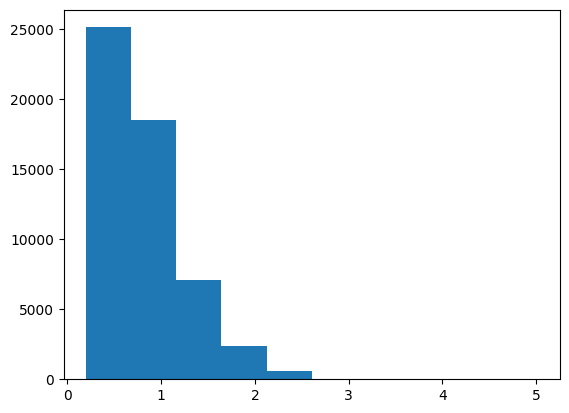

In [8]:
plt.hist(data['carat'])
plt.show()

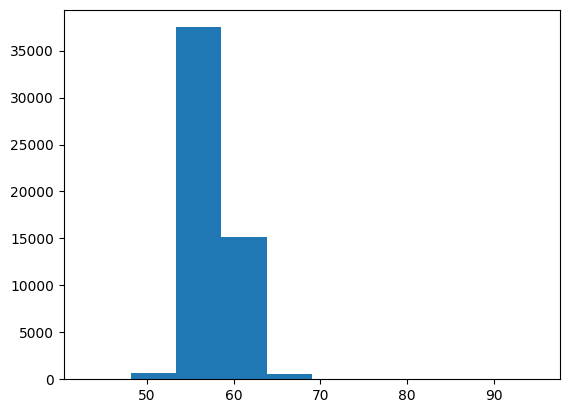

In [9]:
plt.hist(data['table'])
plt.show()

In [10]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


Remove rows with zero values for x, y, and z

In [11]:
data[(data['x']==0) | (data['y']==0) | (data['z']==0)].index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [12]:
data2 = data.drop([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557])

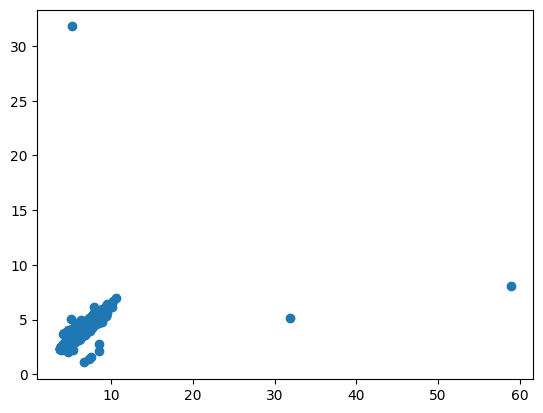

In [13]:
plt.scatter(data2['y'], data2['z'])
plt.show()

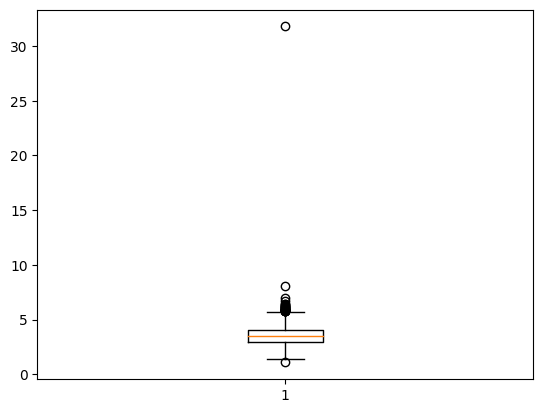

In [14]:
plt.boxplot(data2['z'])
plt.show()

Removing Outliers

In [15]:
data2[(data2['y'] > 15) | (data2['z'] > 15)].index

Int64Index([24067, 48410, 49189], dtype='int64')

In [16]:
data3 = data2.drop([24067, 48410, 49189])

In [17]:
data3.shape

(53929, 9)

Fill the missing values

In [18]:
data3.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [19]:
car_median = data3['carat'].median()
data3['carat'] = data3['carat'].fillna(car_median)

In [20]:
car_table = data3['table'].median()
data3['table'] = data3['table'].fillna(car_table)

In [21]:
data3['color'].value_counts()

G    11234
E     9795
F     9539
H     8301
D     6774
I     5422
J     2808
Name: color, dtype: int64

In [22]:
data3["color"] = data3['color'].fillna("G")

In [23]:
data3.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [24]:
data3.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [25]:
y = data3['price_new']
x = data3.drop("price_new", axis=1)

Convert to categorical

In [26]:
x = pd.get_dummies(x)

Scale features

In [27]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [28]:
x = mn.fit_transform(x)

Split data into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state= 134)

In [31]:
from tensorflow.keras.models import Sequential

In [32]:
from tensorflow.keras.layers import Dense

In [33]:
x.shape

(53929, 25)

Model 1

In [34]:
model1 = Sequential()
model1.add(Dense(32, activation = "relu", input_shape = (25,)))
model1.add(Dense(16, activation = "relu"))
model1.add(Dense(8, activation = "relu"))

model1.add(Dense(1, activation = None))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


 Compile this model

In [35]:
model1.compile(optimizer = "sgd", loss = "mean_squared_error")

Train the wights using backpropogation algorithm

In [36]:
model1.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
338/338 [==============================] - 3s 3ms/step - loss: 7044431910939918336.0000
Epoch 2/10
338/338 [==============================] - 1s 3ms/step - loss: 43748589568.0000
Epoch 3/10
338/338 [==============================] - 1s 3ms/step - loss: 4048428.2500
Epoch 4/10
338/338 [==============================] - 2s 5ms/step - loss: 3998277.7500
Epoch 5/10
338/338 [==============================] - 2s 7ms/step - loss: 3998271.0000
Epoch 6/10
338/338 [==============================] - 2s 7ms/step - loss: 3997954.5000
Epoch 7/10
338/338 [==============================] - 2s 5ms/step - loss: 3998276.2500
Epoch 8/10
338/338 [==============================] - 2s 6ms/step - loss: 3997951.2500
Epoch 9/10
338/338 [==============================] - 2s 6ms/step - loss: 3998017.2500
Epoch 10/10
338/338 [==============================] - 2s 6ms/step - loss: 3998053.2500


In [37]:
model1.evaluate(x_test, y_test)

338/338 [==============================] - 2s 6ms/step - loss: 3897382.2500


3897382.25

model3


In [38]:
from tensorflow.keras.layers import Dropout

In [39]:
model3 = Sequential()
model3.add(Dense(128, input_shape = (25,), activation = "relu"))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = "relu"))
model3.add(Dropout(0.15))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(16, activation = "relu"))
model3.add(Dense(1, activation = None))

In [40]:
model3.compile(optimizer = "adam", loss = "mean_squared_error")

In [41]:
model3.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 7s 5ms/step - loss: 2055542.2500
Epoch 2/30
338/338 [==============================] - 2s 5ms/step - loss: 230617.7031
Epoch 3/30
338/338 [==============================] - 2s 6ms/step - loss: 210617.0938
Epoch 4/30
338/338 [==============================] - 2s 5ms/step - loss: 198601.0000
Epoch 5/30
338/338 [==============================] - 2s 5ms/step - loss: 189916.9844
Epoch 6/30
338/338 [==============================] - 2s 5ms/step - loss: 193158.5312
Epoch 7/30
338/338 [==============================] - 2s 4ms/step - loss: 181080.8438
Epoch 8/30
338/338 [==============================] - 2s 5ms/step - loss: 183503.2031
Epoch 9/30
338/338 [==============================] - 2s 5ms/step - loss: 177768.9531
Epoch 10/30
338/338 [==============================] - 2s 5ms/step - loss: 176442.8750
Epoch 11/30
338/338 [==============================] - 2s 6ms/step - loss: 179696.7500
Epoch 12/30
338/338 [==============================

In [42]:
model3.evaluate(x_test, y_test)

338/338 [==============================] - 1s 4ms/step - loss: 367814.3125


367814.3125

Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(y_test, y_pred)

310612.43175525905

Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [51]:
rf_mse = mean_squared_error(y_test, rf.predict(x_test))
print("Random Forest Regressor MSE: ", rf_mse)

Random Forest Regressor MSE:  74243.49266416018


XGBoost Regressor

In [52]:
from xgboost import XGBRegressor

In [53]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [54]:
xgb_mse = mean_squared_error(y_test, xgb.predict(x_test))
print("XGBoost Regressor MSE: ", xgb_mse)

XGBoost Regressor MSE:  75575.38964359989


Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor


In [56]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=134)
gb_model.fit(x_train, y_train)


GradientBoostingRegressor(random_state=134)

In [57]:
gb_pred = gb_model.predict(x_test)
mse = mean_squared_error(y_test, gb_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 133192.87285951865


Model4


In [58]:
model4 = Sequential()
model4.add(Dense(256, input_shape=(25,), activation="relu"))
model4.add(Dense(128, activation="relu"))
model4.add(Dense(64, activation="relu"))
model4.add(Dense(32, activation="relu"))
model4.add(Dense(16, activation="relu"))
model4.add(Dense(8, activation="relu"))
model4.add(Dense(1, activation=None))


In [59]:
model4.compile(optimizer="adam", loss="mean_squared_error")

In [60]:
model4.fit(x_train, y_train, epochs=30, batch_size=128)

Epoch 1/30
338/338 [==============================] - 6s 4ms/step - loss: 2824753.0000
Epoch 2/30
338/338 [==============================] - 1s 4ms/step - loss: 126540.5469
Epoch 3/30
338/338 [==============================] - 2s 5ms/step - loss: 111576.0391
Epoch 4/30
338/338 [==============================] - 2s 6ms/step - loss: 105176.8750
Epoch 5/30
338/338 [==============================] - 1s 4ms/step - loss: 103250.7344
Epoch 6/30
338/338 [==============================] - 1s 4ms/step - loss: 100439.7969
Epoch 7/30
338/338 [==============================] - 1s 4ms/step - loss: 99347.6797
Epoch 8/30
338/338 [==============================] - 1s 4ms/step - loss: 98803.5938
Epoch 9/30
338/338 [==============================] - 1s 4ms/step - loss: 96480.0391
Epoch 10/30
338/338 [==============================] - 1s 4ms/step - loss: 95411.7969
Epoch 11/30
338/338 [==============================] - 2s 5ms/step - loss: 95100.6719
Epoch 12/30
338/338 [==============================] - 2

In [61]:
model4.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 84626.6406


84626.640625

Model5

In [70]:
from tensorflow.keras import regularizers

In [71]:
model5 = Sequential()
model5.add(Dense(256, input_shape=(25,), activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model5.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model5.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model5.add(Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model5.add(Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model5.add(Dense(8, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model5.add(Dense(1, activation=None))

In [72]:
model5.compile(optimizer="RMSprop", loss="mean_squared_error")


In [73]:
model5.fit(x_train, y_train, epochs=50, batch_size=128)


Epoch 1/50
338/338 [==============================] - 3s 4ms/step - loss: 2094233.7500
Epoch 2/50
338/338 [==============================] - 1s 4ms/step - loss: 139644.1719
Epoch 3/50
338/338 [==============================] - 1s 4ms/step - loss: 121880.1250
Epoch 4/50
338/338 [==============================] - 1s 4ms/step - loss: 113455.1797
Epoch 5/50
338/338 [==============================] - 2s 5ms/step - loss: 111122.8203
Epoch 6/50
338/338 [==============================] - 2s 6ms/step - loss: 109397.5625
Epoch 7/50
338/338 [==============================] - 1s 4ms/step - loss: 107259.2734
Epoch 8/50
338/338 [==============================] - 1s 4ms/step - loss: 104920.3281
Epoch 9/50
338/338 [==============================] - 1s 4ms/step - loss: 104974.8828
Epoch 10/50
338/338 [==============================] - 2s 5ms/step - loss: 103134.5781
Epoch 11/50
338/338 [==============================] - 2s 6ms/step - loss: 103122.1719
Epoch 12/50
338/338 [==============================

In [74]:
model5.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 77771.2891


77771.2890625

Comparing MSE of Different models

*  model 1 		= 3897382.25
*  model 3 		= 367814.3125
*  model 4 		= 84626.640625
*  model 5 		= 77771.2890625
*  Linear Regression	= 310612.43175525905
*  Random forest regressor	= 74243.49266416018  ( the best MSE value )
*  XG boost regressor	= 75575.38964359989
*  Gradient boost regressor= 133192.87285951865








